# Lesson 06, Activity 01

In this activity we do the following

* Create a data frame from a given CSV
* Check for duplicates in the columns that matter
* Check for NaN in the columns that matter
* Apply our domain knowledge to single out and remove outliers
* Generate nice print statements as reports for differents steps

The data set is a 1000 row data set which represnets the traffic on a certain page of a website. The Names, email, and IP are faked out in order to keep the privacy

### Load the data (the file name is - visit_data.csv)

In [1]:
### Write your code bellow this comment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Read the csv
df = pd.read_csv("visit_data.csv")
# print the dataframe
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [42]:
# taking the size of the dataframe into a variable for using in the below code
# There are 1000 rows and 7 columns
prev = df.shape
prev

(974, 7)

In [ ]:
# Print out the output


### Task - 1 (Are there duplicates?)

In [8]:
### Write your code bellow this comment
# check for duplicates in first name
any(df.first_name.duplicated())

True

In [9]:
# check for duplicates in first name
any(df.last_name.duplicated())

True

In [7]:
# No duplicates in email
any(df.email.duplicated())

False

## The above lines show that there are duplicates in first name and last names but not in emails

### Task - 2 (do any essential column contain NaN?)

In [12]:
### Write your code bellow this comment
# Check for NaN values (NULL)in the essential columns
df.email.isnull().values.any()

False

In [13]:
# Check for NaN values (NULL)in the essential columns
df.gender.isnull().values.any()

True

In [14]:
# Check for NaN values (NULL)in the ip address column
df.ip_address.isnull().values.any()

False

In [15]:
# Check for NaN values (NULL)in the visit column
df.visit.isnull().values.any()

True

## The above analysis shows that the email column has no Null values but the gender and visit columns do have nulls

### Task - 3 (Get rid of the outliers)

Consider what are the essential columns if you are preparing this dataset for a model building exercise where the target is to predict number of visits given a user name, email, IP address, Gender etc.

In [33]:
# Copied the original dataframe df into another dataframe df1
# dropping the rows where visit column has the NaN values
# The new shape shows that the new dataframe has 6 rows less than the actual dataframe df
df.dropna(subset=['visit'], how='all', inplace=True)
after = df.shape

### Task - 4 (Report the size difference)

The `shape` method of a data frame gives you a tuple which represents (row, column) of the data frame, in this task you have to compare and report the number of rows before and after getting rid of the outliers

In [35]:
### Write your code bellow this comment
print("Size of dataframe before - {prev[0]} rows and {prev[1]} columns and the size after - {after[0]} rows and {after[1]} columns".format(prev=prev, after=after))

Size of dataframe before - 1000 rows and 7 columns and the size after - 974 rows and 7 columns


### Task - 5 (Box plot visit to further check any Outliers)

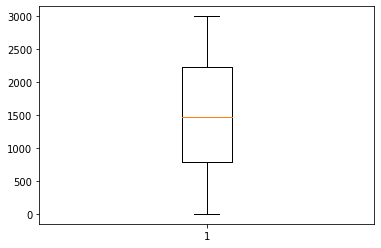

In [37]:
### Write your code bellow this comment
# plotting the box plot
plt.boxplot(df.visit);

In [39]:
# The above boxplot shows that the main data lies between 700 and 2300.
# Thus any value less than 100 or greater than 2900 could be considered as outliers and could be ignored
# So preparing a subset of the data set using the above filter criteria 

df_new = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]
df_new.shape

(923, 7)

In [40]:
print("The new dataframe has {r[0]} rows and {r[1]} columns after removing the outliers. The number of columns remains same.".format(r=df_new.shape))

The new dataframe has 923 rows and 7 columns after removing the outliers. The number of columns remains same.
